# Descriptives, Correlation, Visualization, Data Preprocessing

- Descriptives statistics, Frequencies, Mean, standard deviation, and median
- Correlation magnitude and sign, Correlation vs. Causation (differences, use cases), Correlation in Python
- Plotting continuous variables (histograms, scatter plots & box plots), Plotting discrete variables
- One hot encoding, Feature engineering

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('employee_attrition.csv')

## Descriptive Statistics

In [2]:
# Handling floats because 2 decimal places is easier to read.  In your own analysis in the future you may need more accuracy
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.72,65.89,2.73,2.06,2.73,6502.93,2.69,...,3.15,2.71,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.09,20.33,0.71,1.11,1.10,4707.96,2.50,...,0.36,1.08,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,0.00,...,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,48.00,2.00,1.00,2.00,2911.00,1.00,...,3.00,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,66.00,3.00,2.00,3.00,4919.00,2.00,...,3.00,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,83.75,3.00,3.00,4.00,8379.00,4.00,...,3.00,4.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,4.00,100.00,4.00,5.00,4.00,19999.00,9.00,...,4.00,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [3]:
df['Age'].describe()

count   1470.00
mean      36.92
std        9.14
min       18.00
25%       30.00
50%       36.00
75%       43.00
max       60.00
Name: Age, dtype: float64

## Frequencies

In [4]:
df['Age'].count()

1470

In [5]:
df['Age'].value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [6]:
# Categorical features unique values
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
MaritalStatus : ['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
OverTime : ['Yes' 'No']
No     1054
Yes     416
Name: OverTime, dtype: int64


In [7]:
# Number of unique values
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
DistanceFromHome: Number of unique values 29
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
NumCompaniesWorked: Number of unique values 10
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of unique values 2
RelationshipSatisfaction: Number of unique values 4
StockOptionLevel: Number of unique values 4
TotalWorkingYears: Number of unique values 40
TrainingTimesLastYear: Number of unique values 7
WorkLifeBalance: Number of unique values 4
YearsAtCompany: Number of unique values 37
YearsInCurrentRole: Numb

## Mean, standard deviation, and median

In [8]:
np.mean(df['Age'])

36.923809523809524

In [9]:
np.std(df['Age'])

9.13226569061539

In [10]:
np.median(df['Age'])

36.0

In [11]:
np.nanmedian(df['Age'])

36.0

## Correlation

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

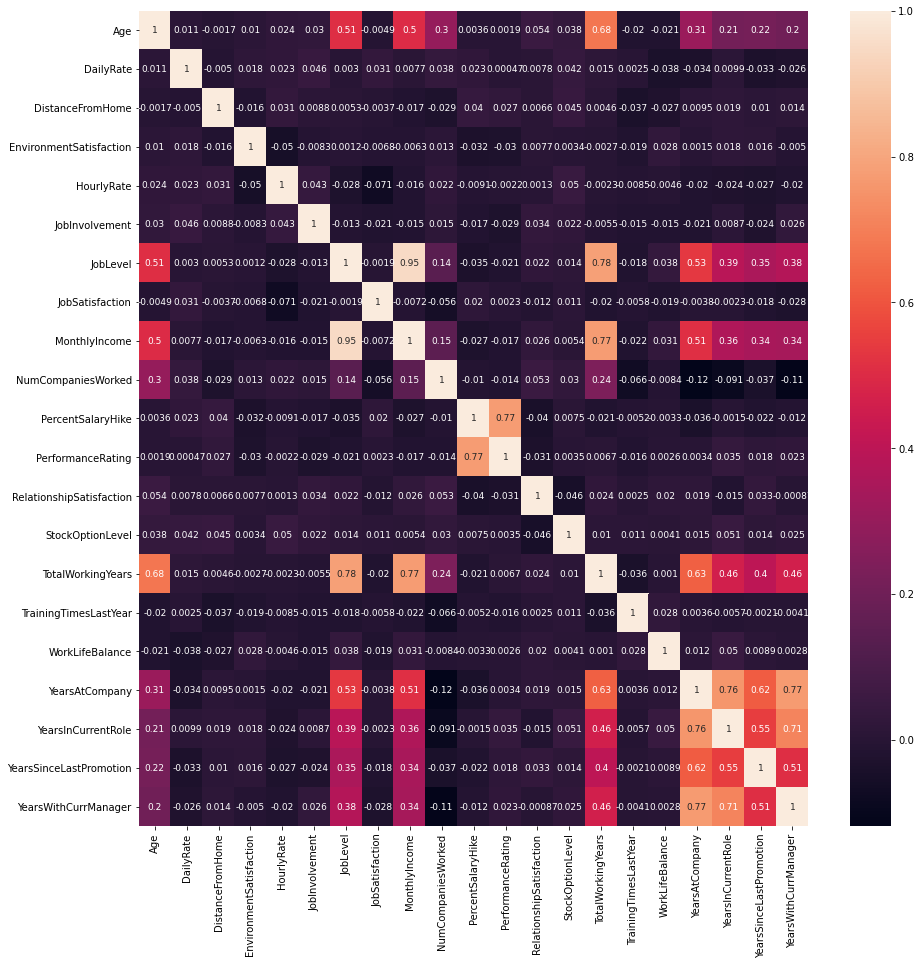

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, annot_kws={"size":9})

## Plotting continuous variables

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   DistanceFromHome          1470 non-null   int64 
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   Gender                    1470 non-null   object
 7   HourlyRate                1470 non-null   int64 
 8   JobInvolvement            1470 non-null   int64 
 9   JobLevel                  1470 non-null   int64 
 10  JobSatisfaction           1470 non-null   int64 
 11  MaritalStatus             1470 non-null   object
 12  MonthlyIncome             1470 non-null   int64 
 13  NumCompaniesWorked        1470 non-null   int64 
 14  OverTime                

In [12]:
for col_name in df:
    if col_name in ['EnvironmentSatisfaction'
                    ,'JobInvolvement'
                    ,'JobLevel'
                    ,'JobSatisfaction'
                    ,'RelationshipSatisfaction'
                    ,'PerformanceRating'
                    ,'WorkLifeBalance'
                   ]:
        df[col_name] = df[col_name].astype('object')
    else:
        pass

total_records= len(df)
columns = ["TotalWorkingYears", "YearsAtCompany", "DistanceFromHome", "YearsInCurrentRole"]
for i in columns:

    ax1 = sns.distplot(df[i])
    plt.show()


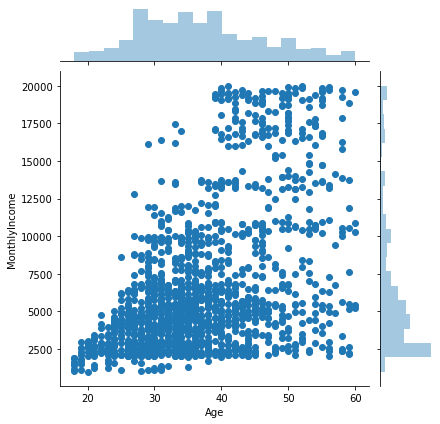

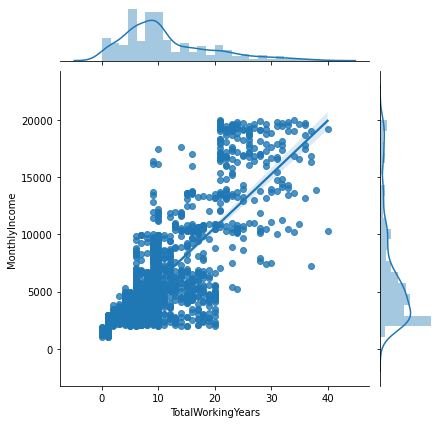

In [13]:
# Joint scatter plot
sns.jointplot(df.Age, df.MonthlyIncome, kind = "scatter")   
plt.show()

# Joint scatter plot with least square line
sns.jointplot(df.TotalWorkingYears,df.MonthlyIncome, kind = "reg")   
plt.show()

## Box Plots

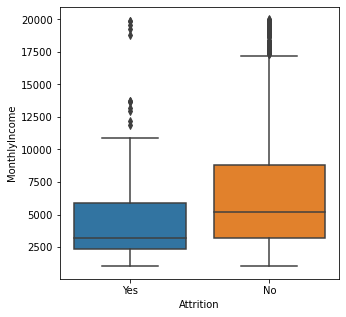

In [14]:
fig,ax = plt.subplots(1,1, figsize=(5,5))                       
sns.boxplot(df['Attrition'], df['MonthlyIncome']) 
plt.show() 

## Plotting discrete variables (bar charts)

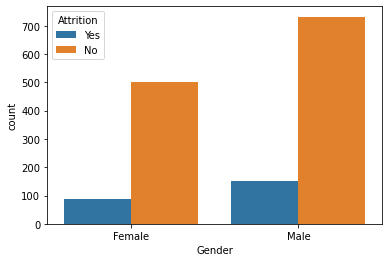

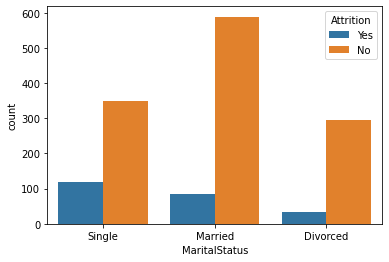

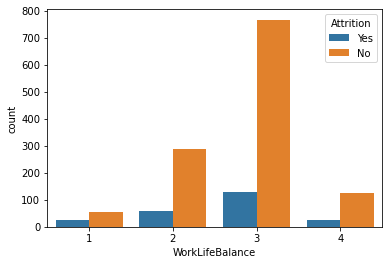

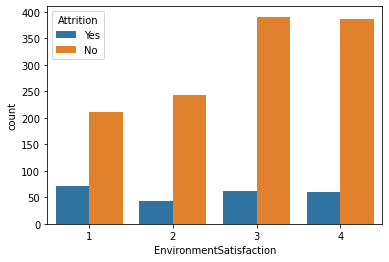

In [15]:
total_records= len(df)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction"]
for i in columns:

    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    plt.show()

In [20]:
df.head(25)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,1,2,Female,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,8,3,Male,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,2,4,Male,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,3,4,Female,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,2,1,Male,40,3,1,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,2,4,Male,79,3,1,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,3,3,Female,81,4,1,...,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,24,4,Male,67,3,1,...,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,23,4,Male,44,2,3,...,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,27,3,Male,94,3,2,...,3,2,2,17,3,2,7,7,7,7


## One hot encoding

In [21]:
# Creating dummy variables for categorical variables for modeling
df1 =  pd.get_dummies(df, columns = ['JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction','BusinessTravel'], drop_first=True)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Age                               1470 non-null   int64 
 1   Attrition                         1470 non-null   object
 2   DailyRate                         1470 non-null   int64 
 3   DistanceFromHome                  1470 non-null   int64 
 4   Gender                            1470 non-null   object
 5   HourlyRate                        1470 non-null   int64 
 6   JobLevel                          1470 non-null   int64 
 7   MaritalStatus                     1470 non-null   object
 8   MonthlyIncome                     1470 non-null   int64 
 9   NumCompaniesWorked                1470 non-null   int64 
 10  OverTime                          1470 non-null   object
 11  PercentSalaryHike                 1470 non-null   int64 
 12  PerformanceRating   

In [24]:
df1.head(25)

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,...,JobSatisfaction_3,JobSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,Yes,1102,1,Female,94,2,Single,5993,8,...,0,1,0,1,0,1,0,0,0,1
1,49,No,279,8,Male,61,2,Married,5130,1,...,0,0,1,0,0,0,1,0,1,0
2,37,Yes,1373,2,Male,92,1,Single,2090,6,...,1,0,1,0,0,0,0,1,0,1
3,33,No,1392,3,Female,56,1,Married,2909,1,...,1,0,0,1,0,0,0,1,1,0
4,27,No,591,2,Male,40,1,Married,3468,9,...,0,0,0,1,0,0,0,0,0,1
5,32,No,1005,2,Male,79,1,Single,3068,0,...,0,1,0,1,0,0,0,1,1,0
6,59,No,1324,3,Female,81,1,Married,2670,4,...,0,0,0,0,1,0,1,0,0,1
7,30,No,1358,24,Male,67,1,Divorced,2693,1,...,1,0,0,1,0,0,0,1,0,1
8,38,No,216,23,Male,44,3,Single,9526,0,...,1,0,1,0,0,0,0,1,1,0
9,36,No,1299,27,Male,94,2,Married,5237,6,...,1,0,0,1,0,0,1,0,0,1


## Feature Engineering

In [25]:
# Creating relevant features that are combinations of other features.
# percent salary hike may not be as relevant as the total dollar amount of the increase.

df1['NewFeatureDollarHike'] = (df1['PercentSalaryHike']/100)*df1['MonthlyIncome']

In [26]:
df1.head(25)

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,...,JobSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,NewFeatureDollarHike
0,41,Yes,1102,1,Female,94,2,Single,5993,8,...,1,0,1,0,1,0,0,0,1,659.23
1,49,No,279,8,Male,61,2,Married,5130,1,...,0,1,0,0,0,1,0,1,0,1179.90
2,37,Yes,1373,2,Male,92,1,Single,2090,6,...,0,1,0,0,0,0,1,0,1,313.50
3,33,No,1392,3,Female,56,1,Married,2909,1,...,0,0,1,0,0,0,1,1,0,319.99
4,27,No,591,2,Male,40,1,Married,3468,9,...,0,0,1,0,0,0,0,0,1,416.16
5,32,No,1005,2,Male,79,1,Single,3068,0,...,1,0,1,0,0,0,1,1,0,398.84
6,59,No,1324,3,Female,81,1,Married,2670,4,...,0,0,0,1,0,1,0,0,1,534.00
7,30,No,1358,24,Male,67,1,Divorced,2693,1,...,0,0,1,0,0,0,1,0,1,592.46
8,38,No,216,23,Male,44,3,Single,9526,0,...,0,1,0,0,0,0,1,1,0,2000.46
9,36,No,1299,27,Male,94,2,Married,5237,6,...,0,0,1,0,0,1,0,0,1,680.81
